Figuras que uso a lo largo de la tesis, para que los estilos sean coherentes.

In [20]:
%matplotlib inline

import glob

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-paper')

plt.rcParams['figure.figsize'] = (10, 6)

## Edad de los conductores por género

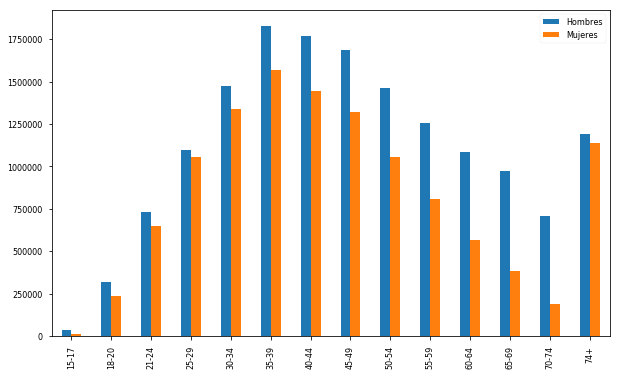

In [21]:
df = pd.DataFrame({
    'Edades':['15-17','18-20','21-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','74+',],
    'Hombres':[39341,318037,729846,1097874,1472038,1828905,1768957,1688069,1460193,1256212,1082591,974768,709285,1190514],
    'Mujeres':[15697,238534,651961,1054377,1337432,1568926,1445740,1321330,1055472,810168,569461,387158,189829,1138945],
})
fig, ax = plt.subplots()
df.plot(kind='bar', ax=ax)
ax.set_xticklabels(df['Edades'])
ax.legend(loc="best");
fig.savefig('../drivers-ages-per-genre.pdf',bbox_inches='tight')

## Rise of deep learning

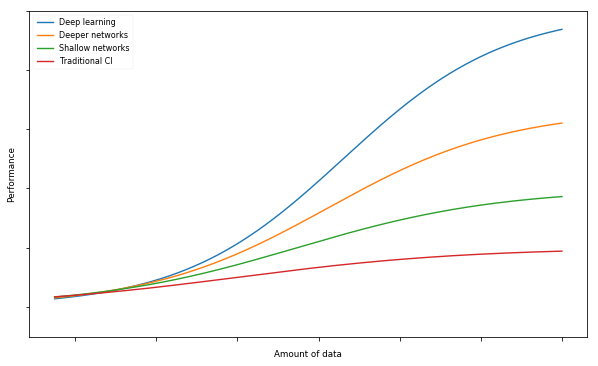

In [22]:
def l(x, a, b, c, k, m, v, q):
    return a + (k - a)/ np.power((c + q * np.exp(-b * (x - m))), 1 / v)


x = np.arange(0.75, 2, 0.001)
y1 = l(x, 0, 5, 0.1, 1, 1, 1, 1)
y2 = l(x, 0, 4.5, 0.15, 1, 1, 1, 1)
y3 = l(x, 0, 4, 0.25, 1, 1, 1, 1)
y4 = l(x, 0, 3.5, 0.5, 1, 1, 1, 1)

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-1, 10))

# Create and show plot
ax.plot(x, y1, label="Deep learning")
ax.plot(x, y2, label="Deeper networks")
ax.plot(x, y3, label="Shallow networks")
ax.plot(x, y4, label="Traditional CI")
ax.legend(loc="best");
ax.set_ylabel('Performance')
ax.set_xlabel('Amount of data')
ax.set_yticklabels([])
ax.set_xticklabels([])
fig.savefig('../deep-learning-capabilities.pdf',bbox_inches='tight')

## Función de activación: sigmoide

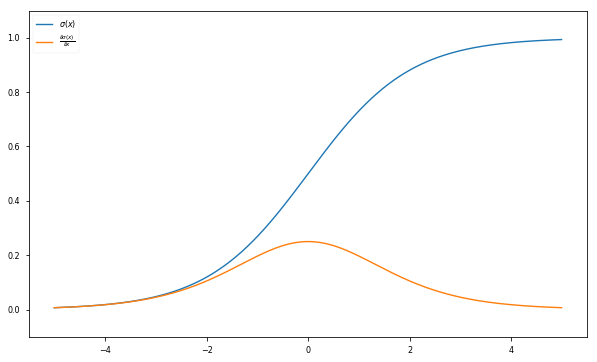

In [23]:
def sigmoid(x):
    return 1./(1+np.e**(-x))

x = np.arange(-5, 5, 0.01)
y = sigmoid(x)
dx = y * (1 - y)

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-0.1, 1.1))

# Create and show plot
ax.plot(x, y, label="$\sigma(x)$")
ax.plot(x, dx, label="$\\frac{\partial \sigma(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('../sigmoid-function.pdf',bbox_inches='tight')

## Función de activación: tangente hiperbólica

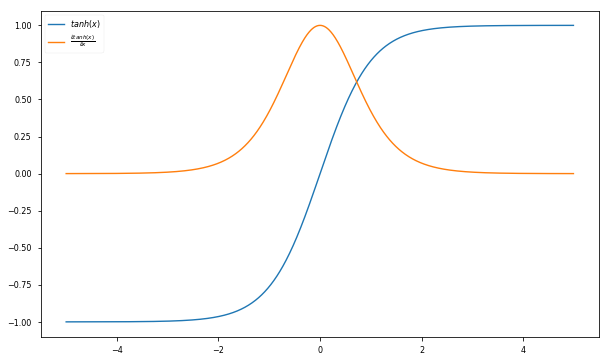

In [24]:
def tanh(x):
    return 1./(1 + np.e ** (-x))

x = np.arange(-5, 5, 0.01)
y = np.tanh(x)
dx = 1 - y ** 2

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-1.1, 1.1))

# Create and show plot
ax.plot(x, y, label="$tanh(x)$")
ax.plot(x, dx, label="$\\frac{\partial tanh(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('../tanh-function.pdf',bbox_inches='tight')

## Función de activación: ReLU

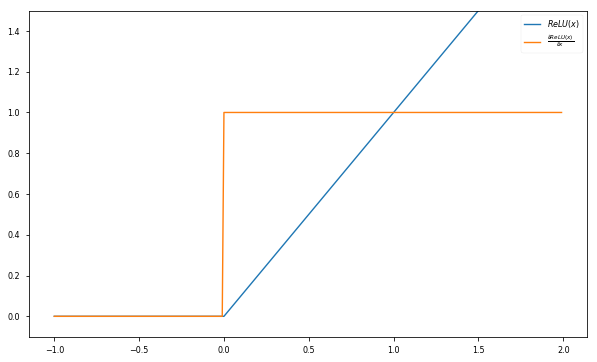

In [25]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-1, 2, 0.01)
y = relu(x)
dx = [0 if r <= 0 else 1 for r in x]

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-0.1, 1.5))

# Create and show plot
ax.plot(x, y, label="$ReLU(x)$")
ax.plot(x, dx, label="$\\frac{\partial ReLU(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('../relu-function.pdf',bbox_inches='tight')

## Función de activación: Leaky ReLU

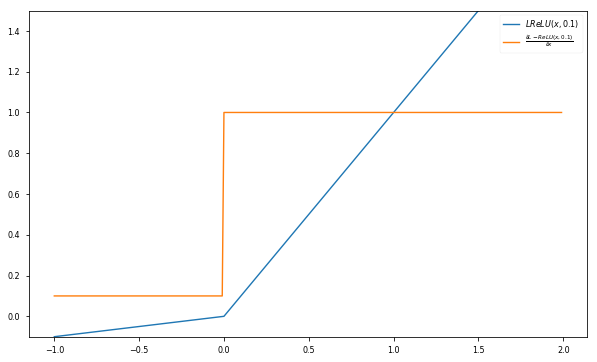

In [26]:
leak = 0.1
def leaky_relu(x):
    return np.maximum(leak * x, x)

x = np.arange(-1, 2, 0.01)
y = leaky_relu(x)
dx = [leak if r <= 0 else 1 for r in x]

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-0.1, 1.5))

# Create and show plot
ax.plot(x, y, label="$LReLU(x, 0.1)$")
ax.plot(x, dx, label="$\\frac{\partial L-ReLU(x, 0.1)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('../leaky-relu-function.pdf',bbox_inches='tight')

## Funciones de pertenencia trangular y trapezoidal

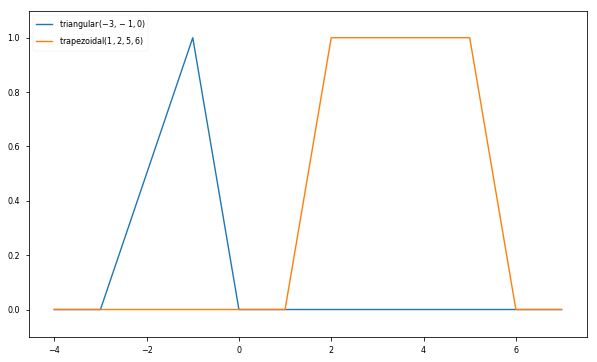

In [27]:
def f(x, a, Δb, Δc, Δd):
    line_asc = (x - a) / Δb
    line_des = (a + Δb + Δc - x) / Δd + 1
    union = min(line_asc, line_des)
    return min(max(union, 0), 1)

x = np.arange(-4, 7, 0.01)
trimf = [f(e, -3, 2, 0, 1) for e in x]
trapmf = [f(e, 1, 1, 3, 1) for e in x]

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-0.1, 1.1))

# Create and show plot
ax.plot(x, trimf, label="triangular($-3, -1, 0$)")
ax.plot(x, trapmf, label="trapezoidal($1, 2, 5, 6$)")
ax.legend(loc="best");
fig.savefig('../trimf-trapmf.pdf',bbox_inches='tight')

## Perfiles de aceleración en los conjuntos de entrenamiento y test

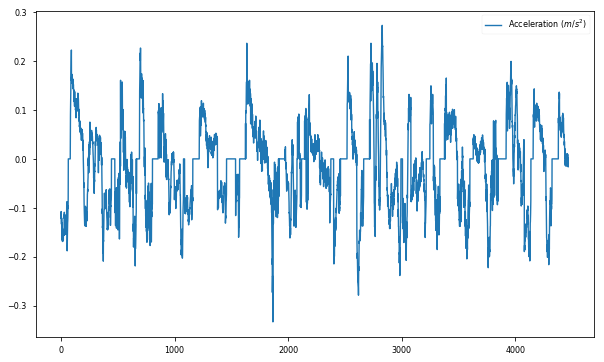

In [28]:
df = pd.read_csv('../../../data-processing/data/cf-all-training.csv', index_col=None)
fig, ax = plt.subplots()

df['Acceleration'].plot(ax=ax, label="Acceleration ($m/s^2$)");
ax.legend(loc="best");
fig.savefig('../acceleration-profile-training.pdf',bbox_inches='tight')

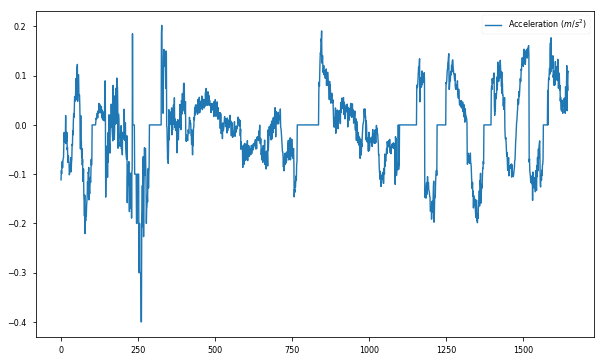

In [29]:
df = pd.read_csv('../../../data-processing/data/cf-all-validation.csv', index_col=None)
fig, ax = plt.subplots()

df['Acceleration'].plot(ax=ax, label="Acceleration ($m/s^2$)");
ax.legend(loc="best");
fig.savefig('../acceleration-profile-test.pdf',bbox_inches='tight')

## Car following

Las gráficas de los modelos entrenados para el comportamiento longitudinal

### Perceptrón multicapa (para todos los sujetos)

In [36]:
X_LIM = (0, 100)

rms_files = sorted([f for f in glob.glob('outputs/cf-mlp-rms-all-*.csv')], key=lambda x: (len(x), x))
out_files = sorted([f for f in glob.glob('outputs/cf-mlp-outputs-all-*.csv')], key=lambda x: (len(x), x))
architectures = [s.replace('.csv', '').replace('outputs/cf-mlp-rms-all-', '') for s in rms_files]
rms_dfs = [pd.read_csv(f, index_col=None) for f in rms_files]
out_dfs = [pd.read_csv(f, index_col=None) for f in out_files]

#### Tabla de errores

Un resumen de los errores sacados tras el entrenamiento por arquitectura

In [38]:
table = {
    'architecture':[],
    'training':[],
    'validation':[],
    'test':[],
}
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    table['architecture'].append(architecture)
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
df = pd.DataFrame(table, index=None)
df.set_index('architecture')

,test,training,validation
architecture,,,
7-16-1,0.059253,0.052741,0.057301
7-8-2-1,0.056607,0.056341,0.061951
7-16-8-1,0.059681,0.046404,0.051878
7-16-16-8-1,0.060971,0.042789,0.046876


#### RMS en training y validation superpuestas

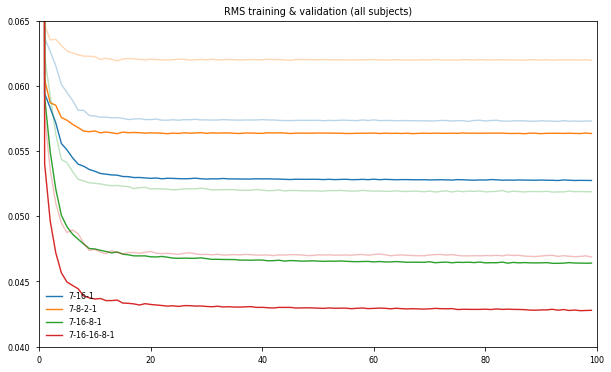

In [39]:
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS training & validation (all subjects)')
ax.set_xlim(*X_LIM)
ax.set_ylim(0.04, 0.065)
stage_df = pd.DataFrame()
lines_training = []
lines_validation = []
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    lines_training += ax.plot(df['training'], label=architecture, color='C{}'.format(i))
    lines_validation += ax.plot(df['validation'], color='C{}'.format(i), alpha=0.3)
ax.legend(handles=lines_training, frameon=False)
fig.savefig('../rms-all-in-training-and-validation-mlp-detail.pdf', bbox_inches='tight')

#### Evolución del error en test

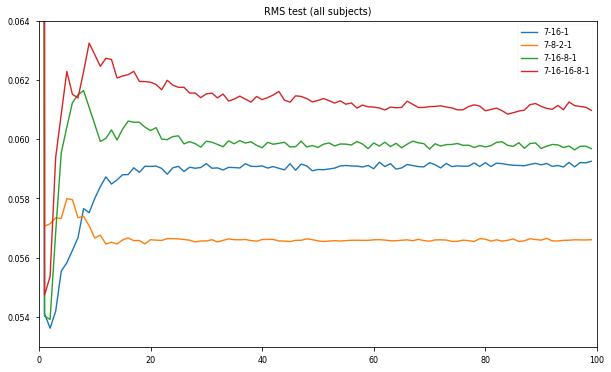

In [44]:
# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS test (all subjects)')
ax.set_xlim(*X_LIM)
ax.set_ylim(0.053, 0.064)
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    lines_training += ax.plot(df['test'], label=architecture, color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('../rms-all-test-mlp-detail.pdf', bbox_inches='tight')    

#### Aproximación al conjunto de test por las arquitecturas

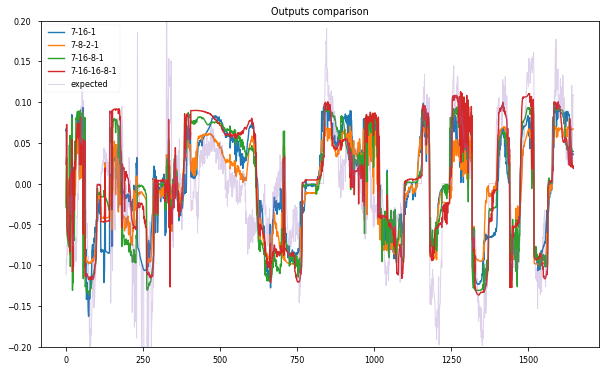

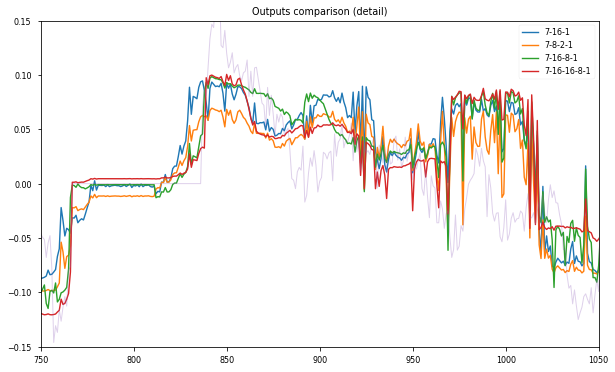

In [47]:
# Aproximación al conjunto de error
outs_df = pd.DataFrame()
for architecture, df in zip(architectures, out_dfs):
    outs_df[architecture] = df['real']
# General
fig, ax = plt.subplots(1, 1)
ax.set_title('Outputs comparison')
ax.set_ylim(-0.2, 0.2)
outs_df.plot(ax=ax);
ax.plot(out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('../mlp-test-comparison.pdf', bbox_inches='tight')

# Detail
fig, ax = plt.subplots(1, 1)
ax.set_title('Outputs comparison (detail)')
#ax.set_xlim(300, 550)
ax.set_xlim(750, 1050)
ax.set_ylim(-0.15, 0.15)
outs_df.plot(ax=ax);
ax.plot(out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
fig.savefig('../mlp-test-comparison-detail.pdf', bbox_inches='tight')